In [5]:
from datetime import datetime
from alpha_realtime_stock import AlphaRealtimeStock
import time
import timeit
import requests
from bs4 import BeautifulSoup
import re
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout   ## importing layers of Neural network
from keras.callbacks import ModelCheckpoint     ## imporing modelcheck pointer
from keras.losses import MSE                  ## importing error function
from keras.optimizers import Adam              ## importing optimizer
from keras.activations import relu

In [6]:
def get_crumbs():
    """
    get crumb  from yahoo finance
    returns crumb
    """
    url = 'https://finance.yahoo.com/quote'
    header = {'Connection': 'keep-alive',
              'Expires': '-1',
              'Upgrade-Insecure-Requests': '1',
              'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) \
               AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.138 Safari/537.36'
              }

    website = requests.get(url, headers=header)
    soup = BeautifulSoup(website.text, 'lxml')
    crumb = re.findall('"CrumbStore":{"crumb":"(.+?)"}', str(soup))
    return crumb[0]

crumb = get_crumbs()
ticker_list = ['ZM']
stock_collection = {}
for ticker in ticker_list:
    stock = AlphaRealtimeStock(ticker, crumb)
    stock_collection[ticker] = stock
# while True:
#     print(datetime.now().strftime("%H:%M:%S"))
    for ticker in ticker_list:
        stock = stock_collection[ticker]
        stock.fetch_webdata()
#         df = stock.get_Stoch_RSI_Indicator()
#         print(df.tail())
#     end = timeit.default_timer()
#     time.sleep(5)

In [7]:
data_tsla = stock.fetch_webdata()

In [8]:
data_tsla

,Datetime,Open,High,Low,Close,Volume
0,2020-10-19 02:15:00,570.00,570.00,567.00,569.16,0
1,2020-10-19 02:20:00,568.00,568.00,567.50,567.50,0
2,2020-10-19 02:25:00,568.60,568.60,568.60,568.60,0
3,2020-10-19 03:10:00,568.99,568.99,568.99,568.99,0
4,2020-10-19 03:40:00,568.60,568.60,568.60,568.60,0
...,...,...,...,...,...,...
455,2020-10-21 17:35:00,514.10,514.46,513.00,513.00,0
456,2020-10-21 17:40:00,512.32,512.32,512.00,512.00,0
457,2020-10-21 17:45:00,512.00,512.00,511.51,512.00,0
458,2020-10-21 17:50:00,511.61,511.62,511.61,511.62,0


In [6]:
data_tsla = data_tsla.dropna()

In [7]:
data_tsla.tail(80)

,Datetime,Open,High,Low,Close,Volume
383,2020-09-22 16:35:00,486.600000,487.000000,486.600000,487.000000,0
384,2020-09-22 16:40:00,487.980000,488.100000,487.980000,488.100000,0
385,2020-09-22 16:45:00,488.000000,488.000000,488.000000,488.000000,0
386,2020-09-22 16:55:00,488.000000,488.000000,488.000000,488.000000,0
387,2020-09-22 17:00:00,488.000000,488.000000,487.750000,487.750000,0
...,...,...,...,...,...,...
458,2020-09-23 09:55:00,522.789978,524.030029,521.650024,523.000000,145075
459,2020-09-23 10:00:00,522.849976,523.325012,518.210022,519.054993,234684
460,2020-09-23 10:05:00,518.530029,521.570007,517.500000,521.039978,249529
461,2020-09-23 10:10:00,521.149902,522.786316,520.809998,521.330017,114114


In [8]:
data_tsla.head()

,Datetime,Open,High,Low,Close,Volume
0,2020-09-18 10:10:00,420.700012,421.000000,418.098907,418.440002,0
1,2020-09-18 10:15:00,418.719910,419.439911,417.359985,419.269989,98921
2,2020-09-18 10:20:00,419.269989,420.768402,418.450012,420.749908,136397
3,2020-09-18 10:25:00,420.404999,420.979889,419.730011,420.270111,86954
4,2020-09-18 10:30:00,420.239990,421.119904,417.600006,418.295105,133920


In [9]:
data_tsla.tail()

,Datetime,Open,High,Low,Close,Volume
458,2020-09-23 09:55:00,522.789978,524.030029,521.650024,523.000000,145075
459,2020-09-23 10:00:00,522.849976,523.325012,518.210022,519.054993,234684
460,2020-09-23 10:05:00,518.530029,521.570007,517.500000,521.039978,249529
461,2020-09-23 10:10:00,521.149902,522.786316,520.809998,521.330017,114114
462,2020-09-23 10:13:40,520.530029,520.530029,520.530029,520.530029,0


In [10]:
data_tsla.shape

(463, 6)

In [11]:
### We will focus on the open price

In [12]:
df = data_tsla['Close'].values
print("Total No. of days of TSLA's Stocks :",df.shape[0])

Total No. of days of TSLA's Stocks : 463


In [13]:
df

array([418.44000244, 419.26998901, 420.74990845, 420.27011108,
       418.29510498, 417.47000122, 417.32998657, 417.76000977,
       417.33499146, 419.66000366, 420.51000977, 419.29998779,
       420.93499756, 420.98001099, 420.41000366, 419.17001343,
       421.32989502, 420.93359375, 420.76998901, 419.8163147 ,
       420.63000488, 421.83499146, 420.89001465, 422.25      ,
       423.57299805, 422.61999512, 425.30999756, 425.48999023,
       427.38000488, 427.08578491, 426.875     , 427.01000977,
       426.38500977, 426.35501099, 427.68960571, 428.07000732,
       428.83920288, 430.28500366, 430.69070435, 431.75      ,
       432.79998779, 433.19000244, 432.68899536, 435.52999878,
       440.80999756, 439.        , 438.73      , 438.51      ,
       438.73      , 438.73      , 440.5       , 438.73      ,
       440.05      , 439.5       , 440.01      , 439.51      ,
       439.84      , 438.7301    , 438.9       , 438.71      ,
       439.89      , 439.57      , 439.54      , 439.6 

In [12]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8)-50:])
print('Training stock :',dataset_train.shape[0],'days')
print('Test stock :',dataset_test.shape[0],'days')

Training stock : 209 days
Test stock : 103 days


In [13]:
dataset_test

array([ 7.82569981,  7.73999977,  7.75      ,  7.80000019,  7.75      ,
        7.61000013,  7.75      ,  7.69999981,  7.71999979,  7.69910002,
        7.68849993,  7.65999985,  7.73000002,  7.62200022,  7.70349979,
        7.75      ,  7.78999996,  7.71000004,  7.71000004,  7.71000004,
        7.6500001 ,  7.69999981,  7.77209997,  7.61000013,  7.67819977,
        7.80000019,  7.76000023,  7.78000021,  7.83990002,  7.75      ,
        7.84000015,  7.88999987,  7.80000019,  7.80000019,  7.8118    ,
        7.76999998,  7.76000023,  7.84000015,  7.82000017,  7.84000015,
        7.8499999 ,  7.80000019,  7.80999994,  7.82000017,  7.80999994,
        7.82999992,  7.8499999 ,  7.82000017,  7.81409979,  7.80000019,
        7.80000019,  7.92000008,  7.98999977,  7.99      ,  7.97      ,
        7.92000008,  7.86000013,  8.30510044,  8.68999958,  9.11520004,
        9.06000042,  8.89999962,  9.58810043,  9.4701004 , 10.42000008,
       11.39000034, 12.60999966, 14.42000008, 13.79510021, 12.97

In [14]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train.reshape(-1, 1))
dataset_test = scaler.transform(dataset_test.reshape(-1, 1))


In [15]:
def create_dataset(df,n):
    '''
    Function to prepare data for the LSTM
    
    '''
    
    x = []
    y = []
  
    for i in range(n, df.shape[0]):
        x.append(df[i-n:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [16]:
x_train, y_train = create_dataset(dataset_train,50)
x_test, y_test = create_dataset(dataset_test,50)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
print('Training data shape',x_train.shape)
print('Test data shape',x_test.shape)

Training data shape (159, 50, 1)
Test data shape (53, 50, 1)


In [17]:
x_test

array([[[0.52365368],
        [0.41165672],
        [0.4247255 ],
        ...,
        [0.51620512],
        [0.50849421],
        [0.49006817]],

       [[0.41165672],
        [0.4247255 ],
        [0.49006817],
        ...,
        [0.50849421],
        [0.49006817],
        [0.49006817]],

       [[0.4247255 ],
        [0.49006817],
        [0.4247255 ],
        ...,
        [0.49006817],
        [0.49006817],
        [0.64688984]],

       ...,

       [[0.49006817],
        [0.64688984],
        [0.73836883],
        ...,
        [4.07083266],
        [3.9532161 ],
        [3.68452833]],

       [[0.64688984],
        [0.73836883],
        [0.73836913],
        ...,
        [3.9532161 ],
        [3.68452833],
        [3.95295437]],

       [[0.73836883],
        [0.73836913],
        [0.71223216],
        ...,
        [3.68452833],
        [3.95295437],
        [3.84866832]]])

In [18]:
model = Sequential()

model.add(LSTM(units=96, 
               return_sequences=True,
               input_shape=(x_train.shape[1], 1)))

model.add(Dropout(0.2))

model.add(LSTM(units=96, 
               return_sequences=True))

model.add(Dropout(0.2))

model.add(LSTM(units=96, 
               return_sequences=True))

model.add(Dropout(0.2))

model.add(LSTM(units=96))

model.add(Dropout(0.2))

model.add(Dense(units=1))

In [19]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 96)            37632     
_________________________________________________________________
dropout (Dropout)            (None, 50, 96)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 96)            74112     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 96)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50, 96)            74112     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 96)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 96)                7

In [20]:
model.compile(loss=MSE, optimizer=Adam())


In [21]:
checkpointer = ModelCheckpoint(filepath='tesla.stock_prediction.hdf5',save_best_only=True,verbose=1)

callbacks = [checkpointer]

In [22]:
history = model.fit(x_train,y_train,batch_size=32,epochs=70,verbose=1,callbacks=[checkpointer],validation_split=0.05)


Epoch 1/70
5/5 [==============================] - ETA: 0s - loss: 0.1870
Epoch 00001: val_loss improved from inf to 0.01087, saving model to tesla.stock_prediction.hdf5
5/5 [==============================] - 2s 313ms/step - loss: 0.1870 - val_loss: 0.0109
Epoch 2/70
5/5 [==============================] - ETA: 0s - loss: 0.0808
Epoch 00002: val_loss did not improve from 0.01087
5/5 [==============================] - 0s 66ms/step - loss: 0.0808 - val_loss: 0.0617
Epoch 3/70
5/5 [==============================] - ETA: 0s - loss: 0.0708
Epoch 00003: val_loss improved from 0.01087 to 0.00225, saving model to tesla.stock_prediction.hdf5
5/5 [==============================] - 0s 72ms/step - loss: 0.0708 - val_loss: 0.0022
Epoch 4/70
5/5 [==============================] - ETA: 0s - loss: 0.0468
Epoch 00004: val_loss improved from 0.00225 to 0.00116, saving model to tesla.stock_prediction.hdf5
5/5 [==============================] - 0s 75ms/step - loss: 0.0468 - val_loss: 0.0012
Epoch 5/70
5/5 [

In [23]:
model = load_model('tesla.stock_prediction.hdf5')


In [24]:
import matplotlib.pyplot as plt

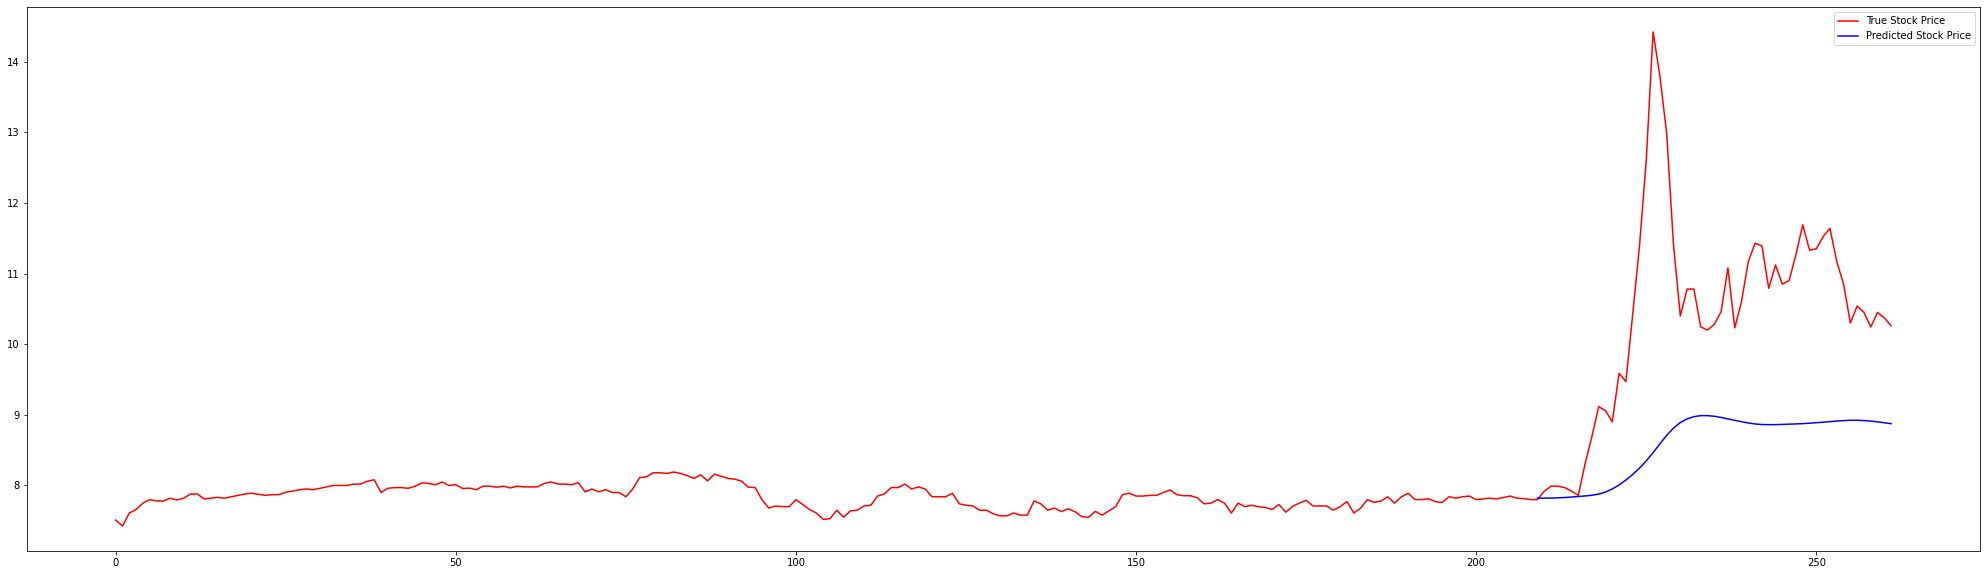

In [25]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

fig, ax = plt.subplots(figsize=(35,10))
plt.plot(df, color='red',  label="True Stock Price",)
ax.plot(range(len(y_train)+50,len(y_train)+50+len(predictions)),predictions, color='blue', label='Predicted Stock Price')
plt.legend()

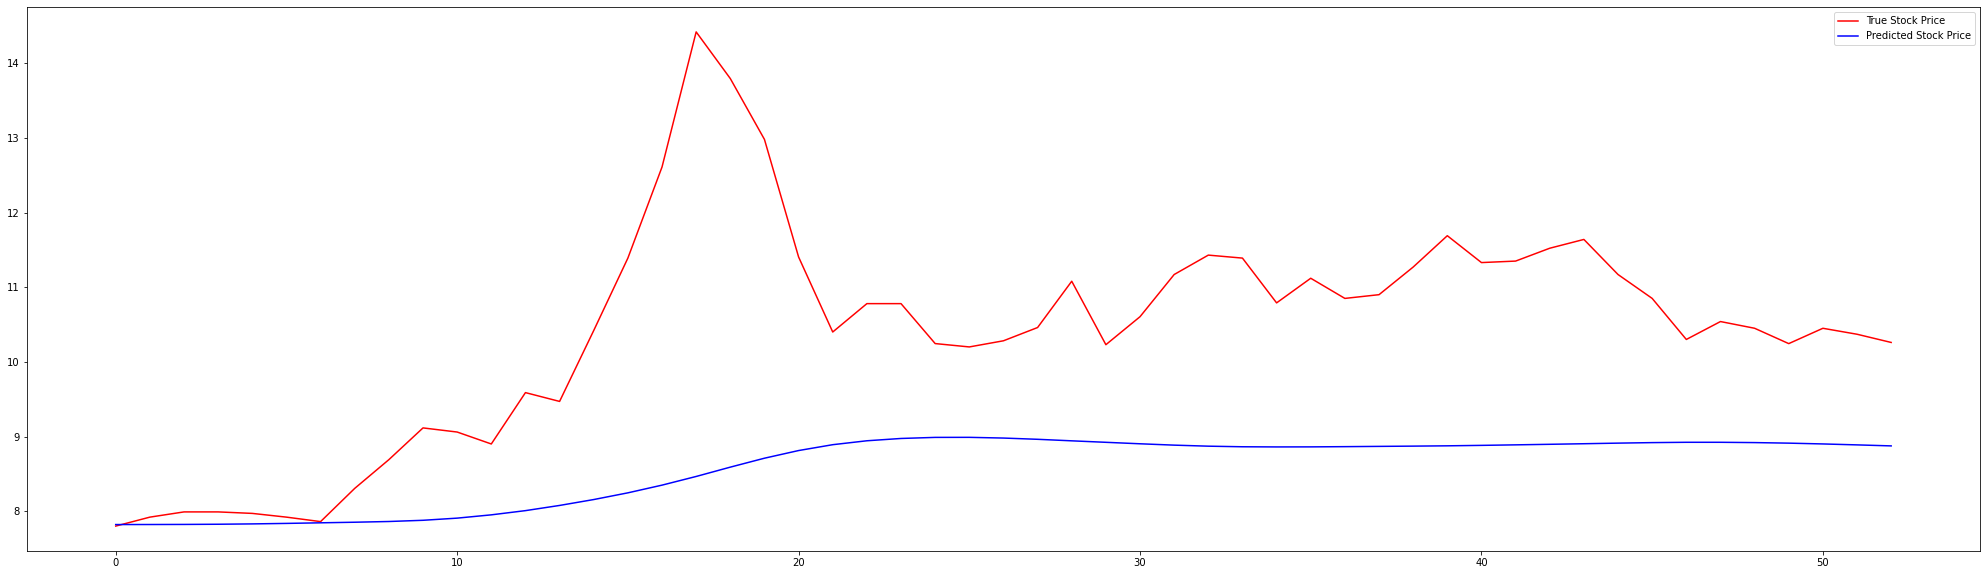

In [26]:
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))


fig, ax = plt.subplots(figsize=(35,10))
ax.plot(y_test_scaled, color='red', label='True Stock Price')
plt.plot(predictions, color='blue', label='Predicted Stock Price')
plt.legend()